In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from sklearn.datasets import load_wine,load_iris
from matplotlib.pyplot import figure
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')



# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  # define meta learner model
  level1 = LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

<Figure size 1280x960 with 0 Axes>

In [11]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['LogisticRegression'] = LogisticRegression()
  models['KNeighborsClassifier'] = KNeighborsClassifier()
  models['Decision tree'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['GaussianNB'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  scores1 = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores,scores1

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

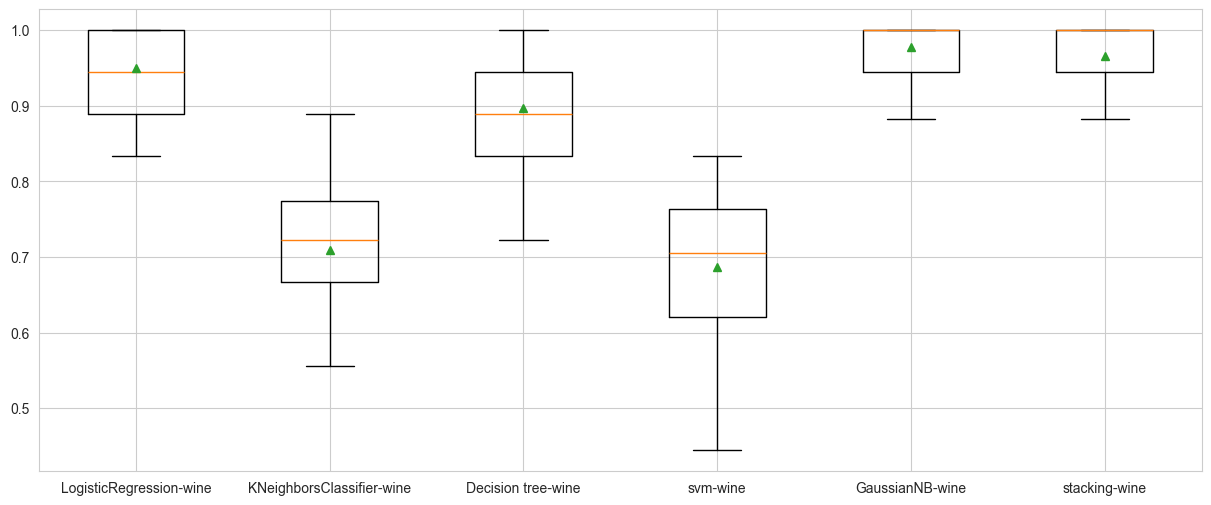

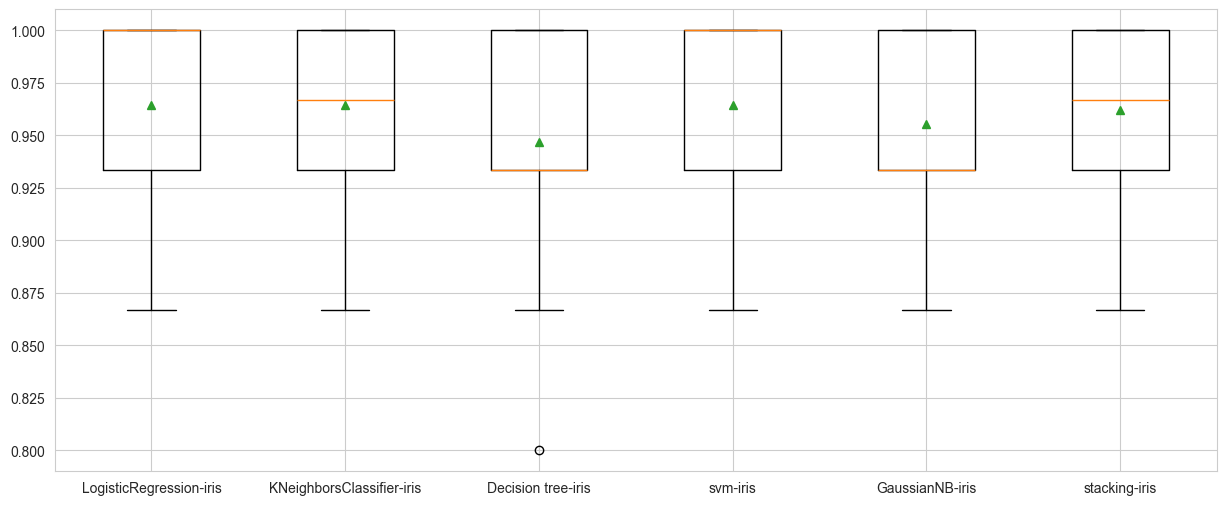

In [12]:
# define dataset
print(load_wine().DESCR)
X,y = load_wine().data,load_wine().target
X1,y1= load_iris().data,load_iris().target
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, results1 = list(), list(),list()
for name, model in models.items():
  scores,scores1= evaluate_model(model)
  results.append(scores)
  results1.append(scores1)
  names.append(name)
  print(scores[0])
  print('>%s -> %.3f (%.3f)---Wine dataset' % (name, mean(scores), std(scores)))
  print('>%s -> %.3f (%.3f)---Iris dataset' % (name, mean(scores1), std(scores1)))
# plot model performance for comparison
pyplot.rcParams["figure.figsize"] = (15,6)
pyplot.boxplot(results, tick_labels=[s+"-wine" for s in names], showmeans=True)
pyplot.show()
pyplot.boxplot(results1, tick_labels=[s+"-iris" for s in names], showmeans=True)
pyplot.show()